
#  Multinomial Logistic Regression

$\mathbf{Multinomial}$ $\mathbf{logistic}$ $\mathbf{regression}$ is a statistical method used for classification problems where the outcome can take on more than two categories. It's an extension of binary logistic regression. The goal is to model the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables.

`````{admonition} Example
:class: tip
- Classification of Texts: Determining the topic of the text (for example, sports, politics, technology, art).

- Medical Diagnosis: Classification of the type of disease (eg, infectious, inflammatory, genetic, metabolic).
`````

```{admonition} Case Study: Real-world Application
:class: note
Multinomial Logistic Regression (MLR) is a powerful statistical method used in various real-world scenarios where the outcome variable can take more than two categories. This versatility makes it an invaluable tool across multiple disciplines. We will explore a case study to illustrate its practical application. There are some case studies: 

::::{grid}
:gutter: 3

:::{grid-item-card} Case Study 1
Diagnosing Medical Conditions
:::

:::{grid-item-card} Case Study 2
Customer Segmentation And Targeting
:::

:::{grid-item-card} Case study 3
Credit Risk Assessment
:::
::::
```

In each of these scenarios, the outcome is multiple categories, and multinomial logistic regression can be used to predict the probability of each category.


Let's imagine a data set $\mathcal D$, where each element consists of a pair of feature vectors $\mathbf x_i$ and a class label $y_i$:

$$
\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^n \quad \text{where } \mathbf{x}_i \in \mathbb{R}^d \text{ and } y_i \in \mathcal{Y}.
$$

Here $\mathcal Y$ —  is the set of possible categories.

Multinomial logistic regression predicts the probability of membership in each category, so the predicted probability vector $\mathbf{\hat{y}}$ is defined as:

$$
\mathbf{\hat{y}} = (p_1, \ldots, p_K), \quad \text{where } p_k > 0 \text{ and } \sum_{k=1}^K p_k = 1.
$$

The logits $\mathbf{z}$ are calculated as a linear combination of the input features $\mathbf{x}$ and the weights $\mathbf{w}_k$ for each class, and the predicted probability vector $\mathbf{\hat{y}}$ is obtained through the softmax function:

$$
z_k = \mathbf{x}^\top \mathbf{w}_k, \quad \mathbf{\hat{y}} = \text{Softmax}(\mathbf{z}) = \left( \frac{e^{z_1}}{\sum_{k=1}^K e^{z_k}}, \ldots , \frac{e^{z_K}}{\sum_{k=1}^K e^{z_k}} \right)
$$

The predicted class is given by the argument that maximizes the probabilities:

$$
\text{Predicted class} = \arg\max_{1 \leq k \leq K} p_k
$$

The weight matrix $\mathbf{W}$ is defined as:

$$
\mathbf{W} = [\mathbf{w}_1 \ldots \mathbf{w}_K]
$$

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from jupyterquiz import display_quiz
display_quiz("quizzes/intro.json")

<IPython.core.display.Javascript object>

### Example: MNIST

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'

X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

X = X.astype(float).values / 255
Y = Y.astype(int).values

##### Splitting into train and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=10000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [28]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 950, 1091, 1030, 1030,  957,  904,  996, 1056,  972, 1014]))

##### Fitting and evaluation

In [29]:
%%time
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.92
CPU times: user 6min 44s, sys: 21.1 s, total: 7min 5s
Wall time: 1min 48s


##### Confusion matrix


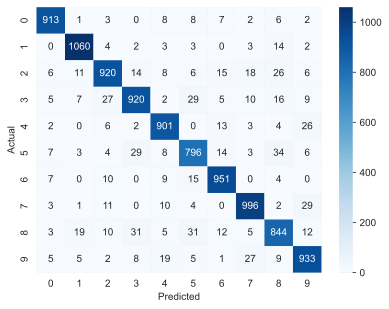

In [30]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred, model.classes_)

##### Prediction Probability Distribution for a Selected Class

##### Sample Digit Visualization

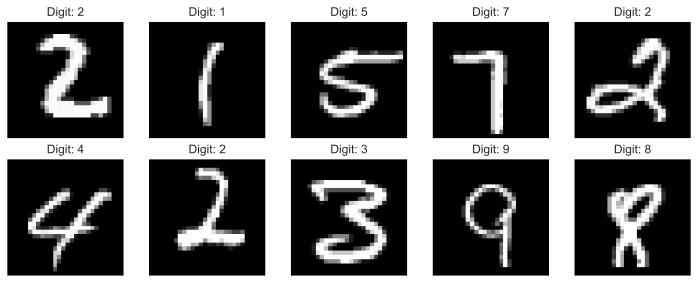

In [32]:
def plot_digits(samples, labels, n_rows=2, n_cols=5):
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')
        plt.title(f"Digit: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_digits(X_test[:10], y_pred[:10])

In [33]:
from jupyterquiz import display_quiz
display_quiz("quizzes/math.json")

<IPython.core.display.Javascript object>

# Example: Iris dataset

### Model Building

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the classifiers to be used
classifiers = {
    'L1 logistic (Multinomial)': LogisticRegression(C=10, penalty='l1',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000, 
                                                    random_state=42),  # Regularization strength, penalty, solver, class type, and maximum iterations for convergence
    'L2 logistic (Multinomial)': LogisticRegression(C=10, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000, 
                                                    random_state=42),
    'L2 logistic (OvR)': LogisticRegression(C=10, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000, 
                                            random_state=42),  # 'ovr' stands for One-vs-Rest
}


### Model Evaluation

Accuracy (train) for L1 logistic (Multinomial): 98.0%
Accuracy (train) for L2 logistic (Multinomial): 98.0%
Accuracy (train) for L2 logistic (OvR): 98.0%


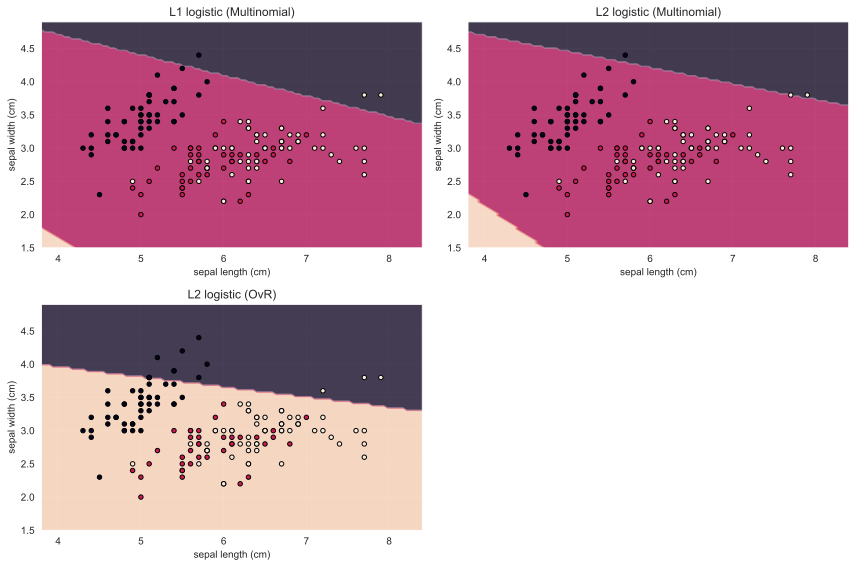

In [37]:
plt.figure(figsize=(12, 8))

# Iterate over each classifier for training and evaluation
for index, (name, classifier) in enumerate(classifiers.items()):
    # Train each classifier using the full feature set
    classifier.fit(X, y)

    # Predict using the trained classifier
    y_pred = classifier.predict(X)

    # Calculate and print the accuracy of the classifier
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for {}: {:.1f}%".format(name, accuracy * 100))

    # Plotting decision regions for visualization
    # Use mean values for the non-plotted features
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), 
                                 np.repeat(iris.data[:, 2].mean(), xx.ravel().size), 
                                 np.repeat(iris.data[:, 3].mean(), xx.ravel().size)])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, index + 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, feature_x_index], X[:, feature_y_index], c=y, edgecolor='k', s=20)
    plt.title(name)
    plt.xlabel(iris.feature_names[feature_x_index])
    plt.ylabel(iris.feature_names[feature_y_index])

plt.tight_layout()
plt.show()


```{note}
L1 Logistic (Multinomial): The decision boundary is more blocky or has sharp changes, which is characteristic of L1 regularization promoting sparsity in the model.

L2 Logistic (Multinomial): The decision boundaries are smoother compared to L1, which is typical for L2 regularization as it tends to distribute weights more evenly and does not promote sparsity.

L2 Logistic (OvR): The One-vs-Rest approach seems to create distinct regions for each class, but the boundaries are somewhat similar to the L2 multinomial logistic regression. This is not surprising given the nature of the Iris dataset and the similarity of the L2 penalty in both cases.
```

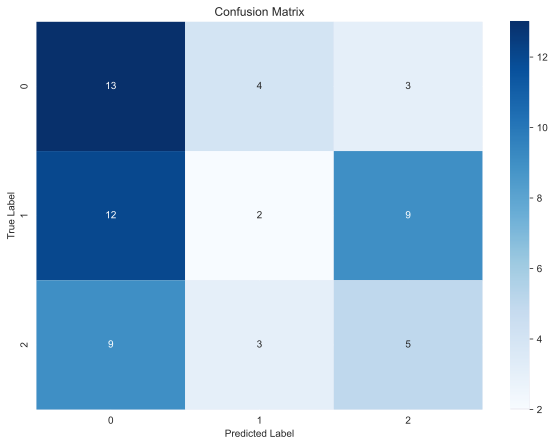

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 65, size=200),
    'Income': np.random.randint(30000, 80000, size=200),
    'Browsing_History': np.random.randint(0, 100, size=200),
    'Past_Purchases': np.random.randint(0, 50, size=200),
    'Customer_Segment': np.random.choice(['High-Spenders', 'Bargain Hunters', 'Occasional Shoppers'], size=200)
})

features = ['Age', 'Income', 'Browsing_History', 'Past_Purchases']
target = 'Customer_Segment'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

